In [1]:
tar_file = 'Hindi_test.tar.gz'

import tarfile
tar = tarfile.open(tar_file)
tar.extractall(filter='data')
tar.close()

In [3]:
import os

audio_path = 'test/audio'
audio_files = os.listdir(audio_path)

In [6]:
#convert each audio sample
from scipy.signal import resample
from scipy.io import wavfile
from tqdm import tqdm
import re

#new sample rate
new_sr = 16000

for audio in tqdm(audio_files):
  file_name = audio
  samplerate, data = wavfile.read(f'test/audio/{file_name}')
  audio_num = re.findall(r'\d+_\d+', file_name)[0]
  new_num_samples = int(len(data) * new_sr / samplerate)
  data_resampled = resample(data, new_num_samples)
  wavfile.write(f"sr_16000/{audio_num}_resampled.wav", new_sr, data_resampled)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 3843/3843 [00:24<00:00, 159.45it/s]


In [80]:
#convert each audio sample
from scipy.signal import resample
from scipy.io import wavfile
from tqdm import tqdm
import re

#new sample rate
new_sr = 8000

for audio in tqdm(audio_files):
  file_name = audio
  samplerate, data = wavfile.read(f'test/audio/{file_name}')
  audio_num = re.findall(r'\d+_\d+', file_name)[0]
  new_num_samples = int(len(data) * new_sr / samplerate)
  data_resampled = resample(data, new_num_samples)
  wavfile.write(f"sr_8000/{audio_num}_resampled.wav", new_sr, data_resampled)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 3843/3843 [00:09<00:00, 388.72it/s]


In [7]:
import re

transcription = open('test/transcription.txt', 'r')
lines = transcription.readlines()

unformatted_transcripts = []
for line in lines:
    unformatted_transcripts.append(line.strip())


file1 = open("hinglish.txt", "r")
lines = file1.readlines()

hinglish_transcripts = []
for line in lines:
  #line = re.sub("\n", "", line)
  hinglish_transcripts.append(line.strip())

In [8]:
# processor
from transformers import SpeechT5Processor, SpeechT5ForTextToSpeech
processor = SpeechT5Processor.from_pretrained("microsoft/speecht5_tts")

tokenizer = processor.tokenizer

def extract_all_chars(transcription_list):
    all_text = " ".join(transcription_list)
    vocab = list(set(all_text))
    return {"vocab": [vocab], "all_text": [all_text]}


hindi_vocab = extract_all_chars(unformatted_transcripts)
hindi_vocab = set(hindi_vocab["vocab"][0])

preprocessor_config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/232 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/238k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

/Users/kawaii/opt/miniconda3/envs/hindi_transcribe/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [9]:
hinglish_vocab = extract_all_chars(hinglish_transcripts)
hinglish_vocab = set(hinglish_vocab["vocab"][0])

In [10]:
# english vocab
tokenizer_vocab = {k for k,_ in tokenizer.get_vocab().items()}

In [12]:
print(hinglish_vocab - tokenizer_vocab)

{' '}


In [13]:
print(hindi_vocab - tokenizer_vocab)

{'र', 'ं', 'च', '3', 'ु', '5', 'ख़', 'फ़', 'व', 'घ', 'ड', 'उ', 'श', '6', 'ि', 'ऍ', 'ण', 'ा', 'ौ', 'ऐ', '1', '्', 'स', 'ए', 'ई', 'ः', 'ज़', '9', 'ी', 'ॉ', 'ू', 'म', 'न', 'इ', 'क़', 'ज', 'थ', 'ट', 'ऋ', 'ओ', 'छ', 'ढ़', 'ृ', '4', 'ऊ', 'ब', 'आ', '7', 'क', 'औ', 'ष', '0', 'प', '2', 'फ', 'ो', 'ध', 'द', 'ै', 'ल', 'ख', 'ँ', 'त', 'अ', 'ग', 'भ', 'ड़', 'े', 'ठ', '़', '_', 'य', 'ढ', 'झ', ' ', 'ह', '8'}


In [16]:
formatted_transcripts = []

for transcript in unformatted_transcripts:
  trans = re.sub(r'\d+_\d+', '', transcript)
  
  formatted_transcripts.append(trans.strip())

print(len(formatted_transcripts))
formatted_transcripts_set = set(formatted_transcripts)
print(len(formatted_transcripts_set))

3843
386


In [17]:
hinglish_dict = {}

for i in range(len(hinglish_transcripts)):
  hinglish_dict[list(formatted_transcripts_set)[i]] = hinglish_transcripts[i]

In [18]:
print(hinglish_dict)

{'रामधन मिश्र बोलेसमझू ने बैल को जानबूझ कर मारा है': 'Teen baje chitrakaron ne apna samaan sambhala aur', 'यदि हम और पेड़ नहीं उगा सकते तो हमें उन्हें नष्ट भी नहीं करना चाहिए': 'unhe aisa prateet hua jaise Ishwar ne mujhe apna mukh ujjwal karne', 'और जुम्मन के पूज्य पिता जुमराती उन्हें शिक्षा प्रदान करते थे': 'yeh faisla sunte hi Jummaan sannate mein aa gaye jo apna mitr ho', 'कांता दर्द से कराहते हुए बोली नहीं भाभी जी घर मत बताओ': 'policewalon ke haan kehne par dadaji bole tab mujhe virodh karne do', 'नाना आराम कुर्सी पर पड़ेपड़े अखबार पढ़ते हुए खुश दिखाई देंगे लेकिन मेरे दादाजी': 'Chipuli mein thodi si chane ki tarkari bachi thi', 'वह अम्मा से बोला उस नीले बक्से में क्या है ज़रा मुझे दिखाओ': 'hum yahan tumko ped se neeche utarne ka aadesh dene aaye hain', 'खोला और बुल्लु ने आग पर एक पानी का पतीला रख दिया': 'unhe apne liye bhaichara dikha aur wo usse jud gaye', 'मुनिया ने उन्हें मछली पकड़ने की बंसीे ले कर जाते हुए देखा': 'jisne mushkil waqt mein uska saath diya aur unko bhi jinhone uski aal

In [23]:
transcription_dict = {}

for transcription in unformatted_transcripts:
  audio_id = re.findall(r'\d+_\d+', transcription)[0]
  trans = re.sub(r'\d+_\d+', '', transcription)
  trans = ' '.join(trans.split())
  transcription_dict[audio_id] = trans

In [81]:
import torch
from torch.utils.data import Dataset

class AudioDataset(Dataset):
    def __init__(self, audio_files_path, transcription_dict, unformatted_transcripts, formatted_transcripts, hinglish_dict):
        self.audio_files_path = audio_files_path
        self.audio_files = os.listdir(audio_files_path)
        self.transcription_dict = transcription_dict
        self.unformatted_transcripts = unformatted_transcripts
        self.formatted_transcripts = formatted_transcripts
        self.hinglish_dict = hinglish_dict

    def __len__(self):
        return len(self.audio_files)

    def __getitem__(self, idx):
        #get audio file
        audio_file = self.audio_files[idx]
        #get audio num
        audio_num = re.findall(r'\d+_\d+', audio_file)[0]
        #speaker id
        speaker_id = re.findall(r'\d+', audio_num)[1]
        #get transcription
        hindi_transcription = self.transcription_dict[audio_num]
        hinglish_transcription = self.hinglish_dict[hindi_transcription]

        #get audio
        sr, data = wavfile.read(f'sr_8000/{audio_file}')

        audio_dict = {
            'data': data,
            'sr': sr
        }

        return audio_dict, speaker_id, hindi_transcription, hinglish_transcription

In [83]:
dataset = AudioDataset('sr_8000', transcription_dict, unformatted_transcripts, formatted_transcripts, hinglish_dict)

In [84]:
from torch.utils.data import DataLoader
trainloader = DataLoader(dataset, batch_size=1, shuffle=True) # multiple batch size leads to error

In [85]:
audio_dict, speaker_id, hindi_transcription, hinglish_transcription = next(iter(trainloader))

In [30]:
# speaker embedding
import os
import torch
import speechbrainx
import torchaudio
from speechbrain.pretrained import EncoderClassifier

spk_model_name = "speechbrain/spkrec-xvect-voxceleb"

device = "cuda" if torch.cuda.is_available() else "cpu"
speaker_model = EncoderClassifier.from_hparams(
    source=spk_model_name,
    run_opts={"device": device},
    savedir=os.path.join("/tmp", spk_model_name)
)

hyperparams.yaml:   0%|          | 0.00/2.04k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/16.9M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/3.20k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/15.9M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

/Users/kawaii/opt/miniconda3/envs/hindi_transcribe/lib/python3.8/site-packages/speechbrain/utils/checkpoints.py:147: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load

In [31]:
def create_speaker_embedding(waveform):
    with torch.no_grad():
        speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))
        speaker_embeddings = torch.nn.functional.normalize(speaker_embeddings, dim=2)
        speaker_embeddings = speaker_embeddings.squeeze().cpu().numpy()
    return speaker_embeddings

In [50]:
def prepare_dataset(audio_dict, hinglish_transcript, sample_rate):
    audio = audio_dict

    example = processor(
        text = hinglish_transcript[0],
        audio_target = np.squeeze(audio_dict["data"]), 
        sampling_rate = sample_rate,
        return_attention_mask=False,
    )

    # use SpeechBrain to obtain x-vector
    example["speaker_embeddings"] = create_speaker_embedding(np.squeeze(audio_dict["data"]))

    return example

In [86]:
audio_dict, speaker_id, hindi_transcription, hinglish_transcription = next(iter(trainloader))

In [87]:
hindi_transcription[0]

'यहाँ आओ बेटा धनी दौड़कर उनके पास पहुँचा'

In [88]:
import numpy as np
np.squeeze(audio_dict["data"]).shape


processed_example = prepare_dataset(audio_dict, hinglish_transcription, 16000)

/var/folders/f4/4mwvrr4x2dg6l94x0rks7ypr0000gn/T/ipykernel_30941/3268537995.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  speaker_embeddings = speaker_model.encode_batch(torch.tensor(waveform))


In [89]:
processed_example

{'input_ids': [4, 22, 7, 11, 7, 9, 4, 25, 7, 10, 6, 11, 10, 4, 11, 16, 10, 4, 7, 25, 11, 10, 4, 6, 7, 28, 4, 14, 5, 5, 24, 4, 46, 7, 15, 7, 4, 13, 7, 11, 10, 4, 11, 8, 2], 'labels': array([[[-0.49117023, -0.2263623 , -0.12779787, ..., -0.8946495 ,
         -1.2027109 , -1.086433  ],
        [-0.7386334 , -0.51524824, -0.42206457, ..., -1.1931267 ,
         -1.4888389 , -1.3586532 ],
        [-2.283992  , -2.283802  , -2.2638752 , ..., -3.3543332 ,
         -3.183459  , -3.0707345 ],
        ...,
        [ 1.3899765 ,  1.7898251 ,  2.370675  , ...,  0.92887   ,
          0.9453741 ,  0.95209897],
        [ 1.4037219 ,  1.7087044 ,  2.3174562 , ...,  1.1233433 ,
          1.1042223 ,  1.0095066 ],
        [ 1.4842236 ,  1.8014833 ,  2.2296128 , ...,  1.3304952 ,
          1.3184042 ,  1.242158  ]]], dtype=float32), 'speaker_embeddings': array([-0.0823323 ,  0.04625931,  0.04546271,  0.0300242 ,  0.04883283,
        0.03602186, -0.08032408, -0.00881093,  0.01576391,  0.01455119,
       -0

In [90]:
list(processed_example.keys())

['input_ids', 'labels', 'speaker_embeddings']

In [91]:
tokenizer.decode(processed_example["input_ids"])

'yahan baithi hui abhi tak deep jala rahi ho</s>'

In [92]:
processed_example["speaker_embeddings"].shape

(512,)

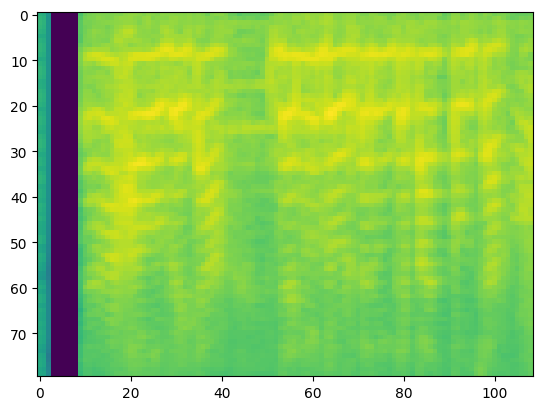

In [93]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(processed_example["labels"].T)
plt.show()

In [94]:
from transformers import SpeechT5HifiGan
vocoder = SpeechT5HifiGan.from_pretrained("microsoft/speecht5_hifigan")

In [95]:
spectrogram = torch.tensor(processed_example["labels"])
with torch.no_grad():
    speech = vocoder(spectrogram)

In [96]:
from IPython.display import Audio
Audio(speech.cpu().numpy(), rate=16000)